# Testing the KL Divergence computation

This notebook generates random Gaussian distributions, computes and plots the continuous and discrete versions of the KL Divergence.

### 0. Import libraries and define settings

In [13]:
import random
import numpy as np

from kl_divergence import KLDivergence, KLDivergenceVisualizer

EPSILON = 1e-10

# allow to automatically update the imported modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1. Generate continuous and discrete Gaussian distributions

In [14]:
def generate_distributions(distrib_no=10, number_of_points=10000):
    """
    This function creates 3 lists: one with many sublists of values sampled
    from a Gaussian distribution, one with means of normal distributions
    and one with standard deviations of normal distributions.
    """

    mus = []
    sigmas = []
    distribs = []

    for index in range(distrib_no):
        # creates a Gaussian distribution
        distrib = np.random.normal(
            np.random.randint(0, 11) / 10,
            np.random.randint(0, 11) / 10,
            number_of_points,
        )

        # scale the distribution between 0 and 1
        distrib_min = min(distrib)
        distrib_max = max(distrib)

        distrib_scaled = (distrib - distrib_min) / (distrib_max - distrib_min + EPSILON)

        # store the scaled distribution together with its mean and std. dev.
        distribs.append(distrib_scaled)
        mus.append(distrib_scaled.mean())
        sigmas.append(distrib_scaled.std())
        
    return distribs, mus, sigmas


In [15]:
distribs_p, mus_p, sigmas_p = generate_distributions()
distribs_q, mus_q, sigmas_q = generate_distributions()
percentages = [np.random.randint(0, 101) for _ in range(len(distribs_p))]

### 2. Compute and plot KL Divergence

In [16]:
kl_divergence = KLDivergence()

##### 2.1. Continuous version that uses the mean and std. dev.

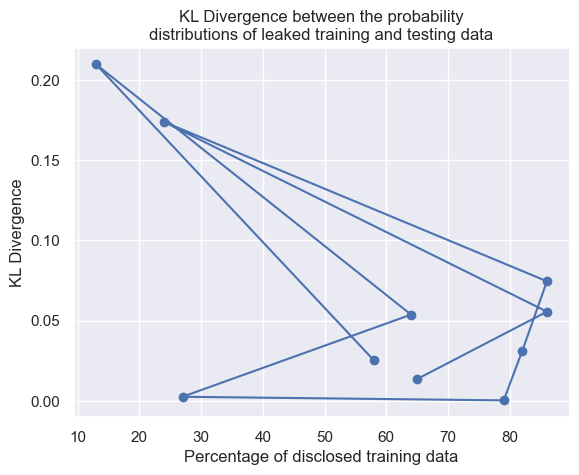

In [17]:
visualizer = KLDivergenceVisualizer()
visualizer.plot(
    percentages,
    kl_divergence.compute_continuous(mus_p, sigmas_p, mus_q, sigmas_q),
    save_figure=True,
    img_title="kl_divergence_continuous",
)


##### 2.2. Discrete version that uses discrete distributions

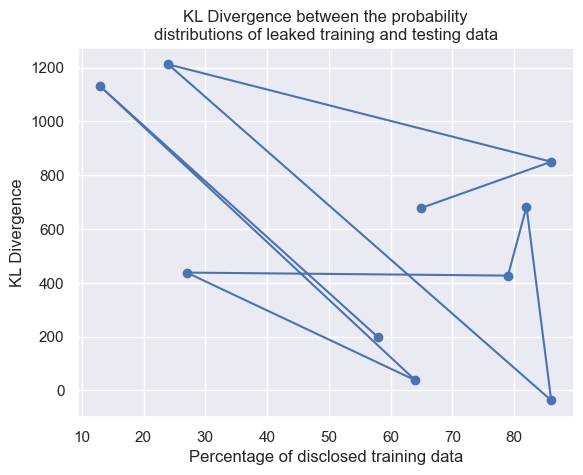

In [18]:
visualizer = KLDivergenceVisualizer()
visualizer.plot(
    percentages,
    kl_divergence.compute_discrete(distribs_p, distribs_q),
    save_figure=True,
    img_title="kl_divergence_discrete",
)
